In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report as cr,confusion_matrix as cm

In [5]:
data=pd.read_csv('credi_score.csv')
data1=data.drop('Unnamed: 0',axis=1)

In [6]:
data1.head()

,ID,Customer_ID,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,23,19114.12,1824.843333,3,4,3,4,...,2,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,5635,3392,2,23,19114.12,4194.248822,3,4,3,4,...,1,809.98,31.944960,191.0,1,49.574949,118.280222,3,284.629163,0
2,5636,3392,3,-500,19114.12,4194.248822,3,4,3,4,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,5637,3392,4,23,19114.12,4194.248822,3,4,3,4,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,5638,3392,5,23,19114.12,1824.843333,3,4,3,4,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0


In [7]:
data1.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [8]:
data1=data1.dropna()

In [9]:
data1.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Age                       100000 non-null  int64  
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [11]:
data1.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5.634000e+03,43132.75,80631.50,118130.25,155629.00
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1.006000e+03,13664.50,25777.00,38385.00,50999.00
Month,100000.0,4.500000e+00,2.290000e+00,1.000000e+00,2.75,4.50,6.25,8.00
Age,100000.0,1.106500e+02,6.862400e+02,-5.000000e+02,24.00,33.00,42.00,8698.00
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.50,37578.61,72790.92,24198062.00
Monthly_Inhand_Salary,100000.0,4.194180e+03,2.935180e+03,3.036500e+02,1792.08,3852.74,5371.52,15204.63
Num_Bank_Accounts,100000.0,1.709000e+01,1.174000e+02,-1.000000e+00,3.00,6.00,7.00,1798.00
Num_Credit_Card,100000.0,2.247000e+01,1.290600e+02,0.000000e+00,4.00,5.00,7.00,1499.00
Interest_Rate,100000.0,7.247000e+01,4.664200e+02,1.000000e+00,8.00,13.00,20.00,5797.00
Num_of_Loan,100000.0,3.010000e+00,6.265000e+01,-1.000000e+02,1.00,3.00,5.00,1496.00


<Axes: >

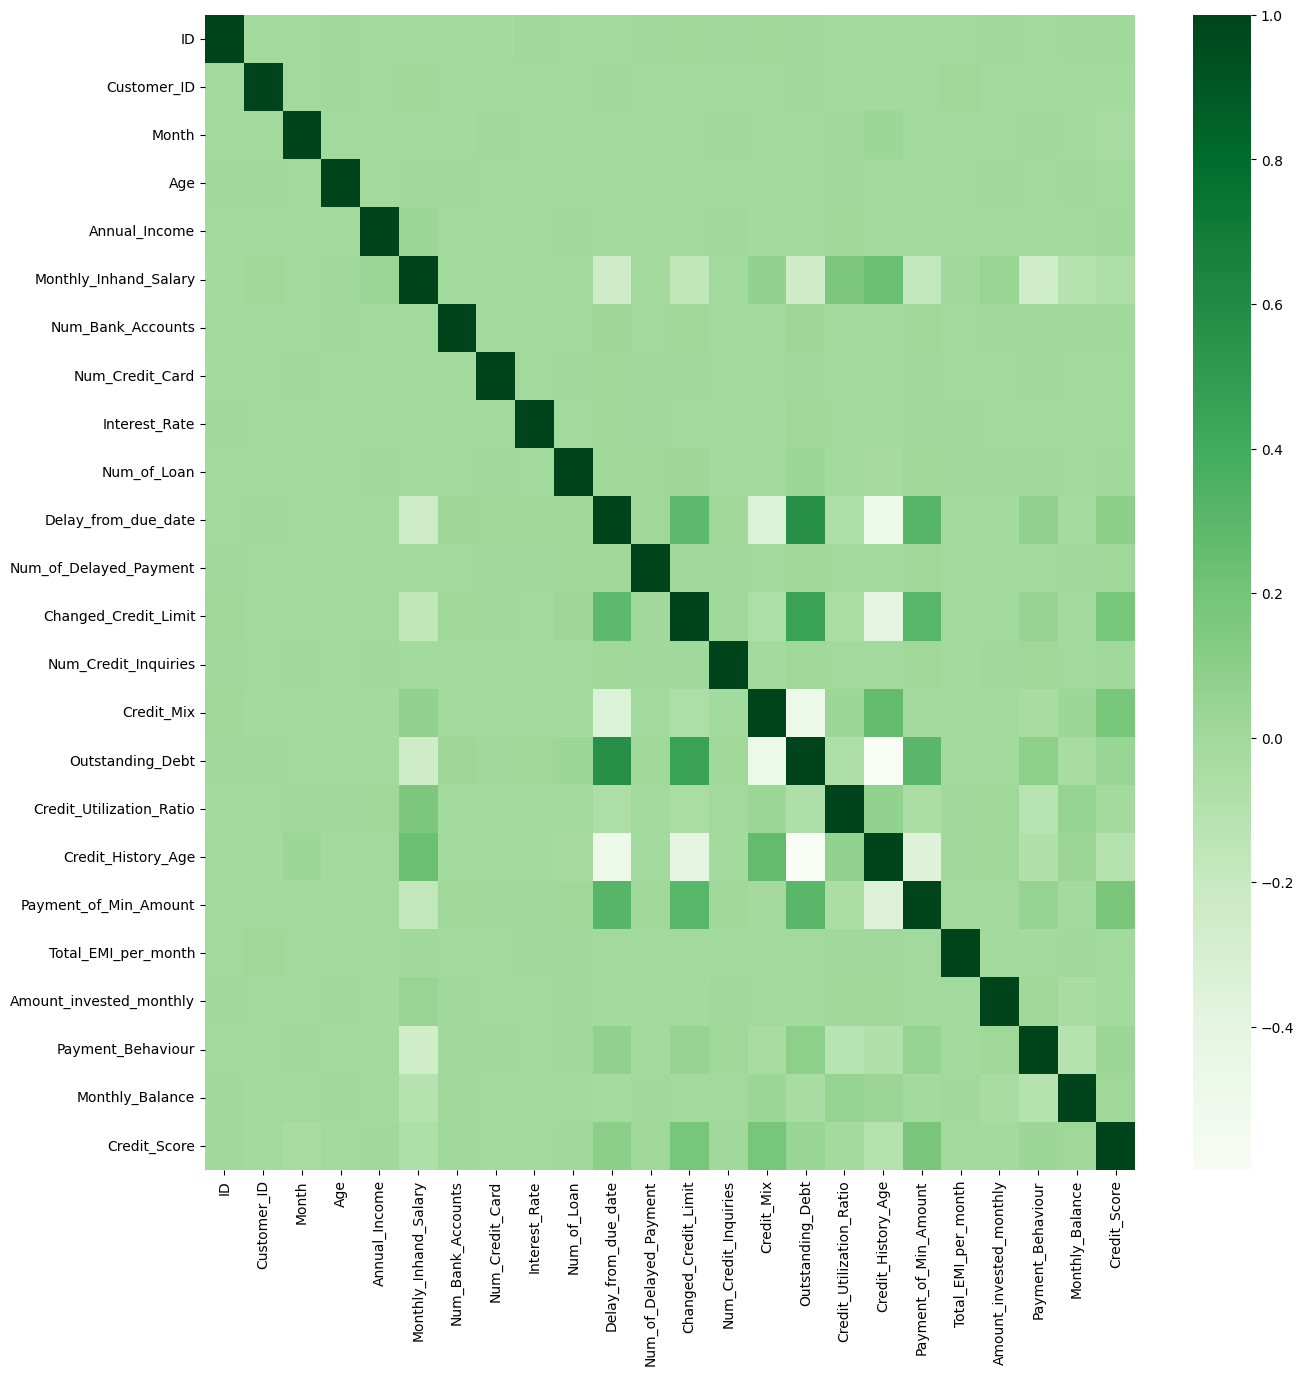

In [12]:
fig,axs=plt.subplots(figsize=(15,15))
sns.heatmap(data1.corr(),cmap='Greens')

In [13]:
data1['Annual_Income'].median()

37578.61

In [14]:
data1.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [15]:
X = data1[["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
        "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix", "Outstanding_Debt", "Credit_History_Age", 
        "Monthly_Balance"]]
y = data1[['Credit_Score']]



In [16]:
param_grid = {
    'C': [0.01,0.005,0.1,1, 7.6,10,100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.30, random_state=69)

In [18]:
svm=SVC().fit(X_train,y_train)

In [19]:
y_pred=svm.predict(X_test)
report=cr(y_test,y_pred)
print(report)
conf_matr=cm(y_test,y_pred)
print(conf_matr)

In [20]:
# Create a GridSearchCV object with SVC as the estimator and the parameter grid
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

In [21]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [22]:
report=cr(y_test,y_pred)

In [23]:
# Create the Random Forest Classifier
rfc = RandomForestClassifier()

In [25]:
rf=rfc.fit(X_train,y_train)

<ipython-input-25-5e6ba3913f0d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=rfc.fit(X_train,y_train)


In [26]:
y_pred_rfc=rf.predict(X_test)

In [28]:
report=cr(y_test,y_pred_rfc)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      5349
           1       0.78      0.80      0.79      8699
           2       0.80      0.80      0.80     15952

    accuracy                           0.78     30000
   macro avg       0.77      0.76      0.77     30000
weighted avg       0.78      0.78      0.78     30000



In [24]:
# Define the parameter grid for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# Create a GridSearchCV object with RFC as the estimator and the parameter grid
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

KeyboardInterrupt: ignored

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

In [ ]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)